**ANALYSIS OF HEALTHACARE PARAMETERS FOR WELL BEING (OBESITY)**

HET SEVALIA : 22070126045

JHEEL TURAKHIA : 22070126050

# **Data Pre-processing**

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [28]:
data = pd.read_csv('/content/ObesityDataset.csv')

In [29]:
print("Initial Data Head:")
print(data.head())

Initial Data Head:
   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no     2    3   
1  Female   21    1.52    56.0                            yes   no     3    3   
2    Male   23    1.80    77.0                            yes   no     2    3   
3    Male   27    1.80    87.0                             no   no     3    3   
4    Male   22    1.78    89.8                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no    0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes    3  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no    2  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no    2  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no    0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  


Checking Data type of columns

In [30]:
print("Data Types:")
print(data.dtypes)

Data Types:
Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                                 int64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Checking for missing values

In [31]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Feature engineering

Adding BMI column from Weight and Height

In [32]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

Finding out unique values in categorical columns

In [33]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
data['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
data['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [37]:
data['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
data['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [39]:
data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [40]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Derived columns

Dietary_Habits:
Checks diet quality by combining junk food and veggie habits. It shows how balanced someone's eating is using FAVC and FCVC.

Health_Monitoring:
Looks at how well someone monitors their health by their calorie counting and water drinking habits. It uses SCC and CH2O to see how health-conscious they are.

Obesity_Risk:
Tells the risk of obesity by checking family history and the person's current weight status. It combines family background and their NObeyesdad status to gauge obesity risk.

In [41]:
def dietary_habits(favc, fcvc):
    if favc == 'yes' and fcvc <= 2:
        return 'Poor'
    elif favc == 'no' and fcvc >= 2:
        return 'Good'
    else:
        return 'Average'

def health_monitoring(scc, ch2o):
    if scc == 'yes' and ch2o >= 2:
        return 'Attentive'
    elif scc == 'no' and ch2o <= 2:
        return 'Negligent'
    else:
        return 'Average'

def obesity_risk(family_history, nobeyesdad):
    if family_history == 'yes' and nobeyesdad in ['Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I']:
        return 'High'
    elif family_history == 'no' and nobeyesdad in ['Insufficient_Weight', 'Normal_Weight']:
        return 'Low'
    else:
        return 'Moderate'


In [42]:
data['Dietary_Habits'] = data.apply(lambda row: dietary_habits(row['FAVC'], row['FCVC']), axis=1)

data['Health_Monitoring'] = data.apply(lambda row: health_monitoring(row['SCC'], row['CH2O']), axis=1)

data['Obesity_Risk'] = data.apply(lambda row: obesity_risk(row['family_history_with_overweight'], row['NObeyesdad']), axis=1)

In [43]:
data.to_csv('Final_ObesityDataset.csv', index=False)

Applying Label Encoding to convert categorical data into numerical format for training machine learning algorithms.

In [44]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

binary_mapping = {'yes': 1, 'no': 0}
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    data[col] = data[col].map(binary_mapping)

mapping_calc = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
data['CALC'] = data['CALC'].map(mapping_calc)
mapping_mtrans = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
data['MTRANS'] = data['MTRANS'].map(mapping_mtrans)
mapping_caec = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
data['CAEC'] = data['CAEC'].map(mapping_caec)
mapping_nobeyesdad = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['NObeyesdad'] = data['NObeyesdad'].map(mapping_nobeyesdad)

Appling Standard Scaler to ensure that machine learning algorithms perform
optimally and features maintain their importance

In [45]:
columns_to_scale = [
    'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
    'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'NObeyesdad', 'BMI'
]

scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print(data.head())

     Gender       Age    Height    Weight  family_history_with_overweight  \
0  1.011914 -0.471293 -0.874380 -0.862558                        0.472291   
1  1.011914 -0.471293 -1.945660 -1.168077                        0.472291   
2 -0.988227 -0.154194  1.053924 -0.366089                        0.472291   
3 -0.988227  0.480005  1.053924  0.015809                       -2.117337   
4 -0.988227 -0.312743  0.839668  0.122741                       -2.117337   

       FAVC      FCVC       NCP      CAEC     SMOKE  ...       SCC       FAF  \
0 -2.759769 -0.355724  0.574095 -0.300346 -0.145900  ... -0.218272 -0.882428   
1 -2.759769  1.313015  0.574095 -0.300346  6.853997  ...  4.581439  2.720679   
2 -2.759769 -0.355724  0.574095 -0.300346 -0.145900  ... -0.218272  1.519643   
3 -2.759769  1.313015  0.574095 -0.300346 -0.145900  ... -0.218272  1.519643   
4 -2.759769 -0.355724 -1.835277 -0.300346 -0.145900  ... -0.218272 -0.882428   

        TUE      CALC    MTRANS  NObeyesdad       BMI  D

In [46]:
data.to_csv('Final_Model_ObesityDataset.csv', index=False)

# **Expolatory Data Analysis**

In [47]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [48]:
# Reading the dataset
file_path = "/content/Final_ObesityDataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Dietary_Habits,Health_Monitoring,Obesity_Risk
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,...,no,0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Good,Negligent,Moderate
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,...,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Good,Attentive,Moderate
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,...,no,2,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Good,Negligent,Moderate
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,...,no,2,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Good,Negligent,Moderate
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,...,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Good,Negligent,Moderate


The following subplots helps to analyse the raw data and understand the distribution for each column.

In [49]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

for i, col in enumerate(columns, 1):
    counts = data[col].value_counts().values
    trace = go.Bar(
        x=data[col].value_counts().index,
        y=counts,
        text=counts,
        textposition='outside'
    )
    fig.add_trace(trace, row=(i-1)//3+1, col=(i-1)%3+1)

    max_count = max(counts)
    fig.update_yaxes(range=[0, max_count + 0.2 * max_count], row=(i-1)//3+1, col=(i-1)%3+1)
    fig.update_xaxes(tickangle=45, row=(i-1)//3+1, col=(i-1)%3+1)

fig.update_layout(title='Categorical Variables', height=800, width=1000)

fig.show()

-The distribution for gender is balanced for both the genders and not skewed to one side

-Family History of overweight is comparitively high for YES which can be further used for infereneces.

-The frequency of calorie consumption is YES for majority of the total values.

-Now, the above chart might provide an insight on what could be the reason behind the ever-increasing issue. As it can be seen, very few people prefer “Walking” or riding a bike for travelling. Most of the people prefer Public transportation or Automobile modes of transportation.

-The obesity categories are similar for all the categories with obesity_type_I contributing slightly more.

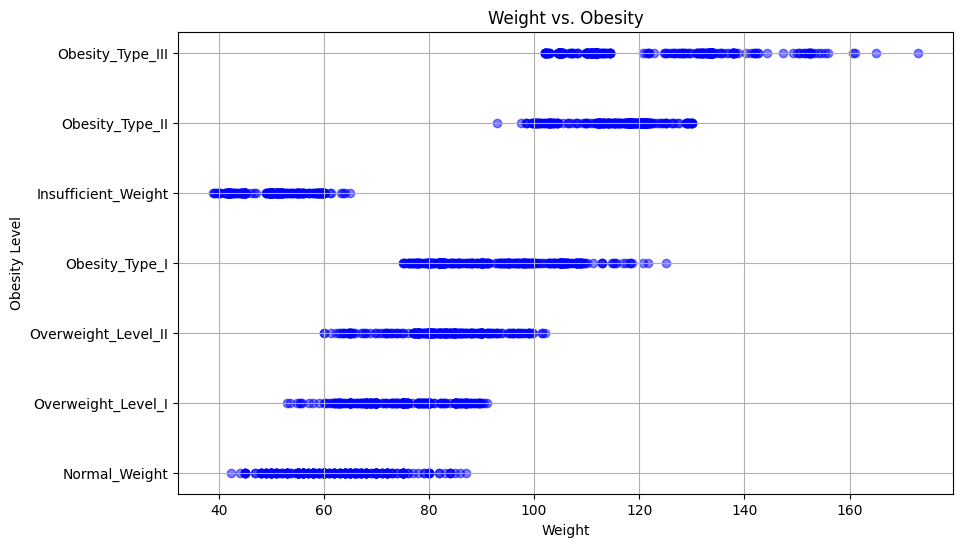

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Weight'], data['NObeyesdad'], alpha=0.5, color='blue')
plt.title('Weight vs. Obesity')
plt.xlabel('Weight')
plt.ylabel('Obesity Level')
plt.grid(True)

plt.show()

-The above scatter plot helps to get an overview of the distribution of weight across diffrent category levels.

In [51]:
fig = px.box(data, x='NObeyesdad', y='Weight', title='Weight Distribution by Obesity Level',labels={'Weight': 'Weight', 'NObeyesdad': 'Obesity Level'})
fig.show()

-The box-plot helps to analyse the weight in a better manner with showing the mean and median weight for each of the obesity category.

<ipython-input-52-aad155b643c6>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




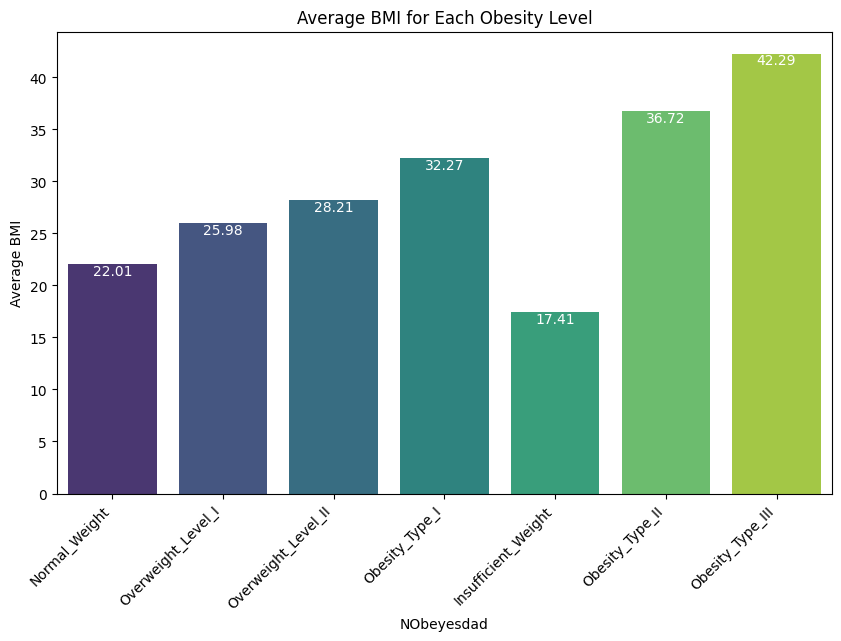

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NObeyesdad', y='BMI', data=data, palette='viridis', ci=None)

plt.title('Average BMI for Each Obesity Level')
plt.xlabel('NObeyesdad')
plt.ylabel('Average BMI')
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(plt.gca().patches):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom' if yval < 0 else 'top', ha='center', color='white', fontsize=10)

plt.show()

-BMI averages clearly illustrates the progression form normal weight to different levles of overweight and obesity.

-Higher BMI averages indicate a higher degree of obesity and associated health risks.

-The value here matches with the WHO Classification for each cateogory of obesity.

DOES SMOKING HABIT AFFECT OBESITY ?

In [53]:
fig = px.histogram(data, x="Age", color="Age", marginal="rug",
                   hover_data=data.columns)

fig.update_layout(title="Interactive Age Distribution",
                  xaxis_title="Age",
                  yaxis_title="Frequency",
                  coloraxis_showscale=False)

fig.show()

-The above graph shows a positively skewed distribution indicating that the age between 18-26 years of age is more frequent in the dataset.

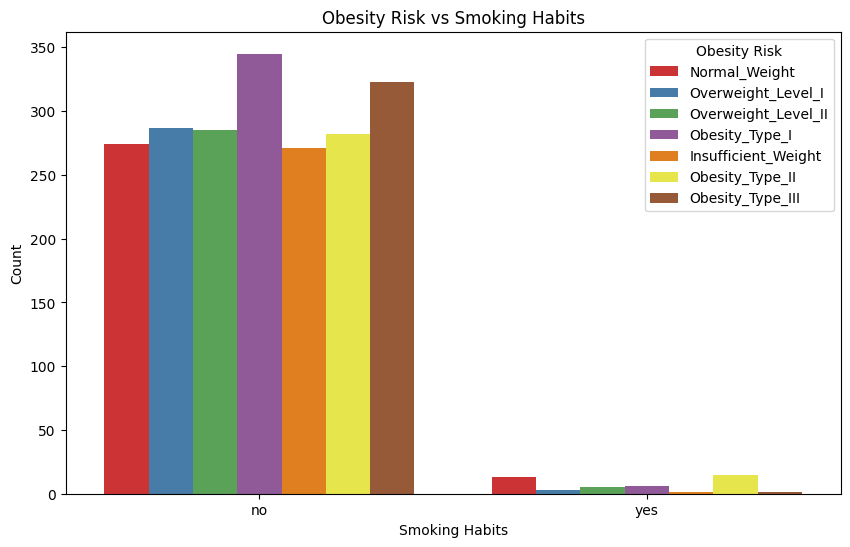

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKE', hue='NObeyesdad', data=data, palette='Set1')
plt.title('Obesity Risk vs Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Count')
plt.legend(title='Obesity Risk')
plt.show()

-This graph helps us to interpret that the obesity categories for people with NO SMKOING habits are more as compared to population with the YES category beacuse smoking can lead to increased metabolism, which may result in weight loss.

Nicotine, a component of cigarettes, is an appetite suppressant. It can reduce the sense of hunger and may lead to decreased food intake.

This helps us to infer that for a short span smokig has less realtion with the obesity patterns.

In [55]:
frequency = data['NObeyesdad'].value_counts()

fig = px.pie(frequency, names=frequency.index, values=frequency.values,
             title='Distribution of NObeyesdad',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textinfo='percent+label')

fig.show()

-Obesity Type I, Obesity Type II, and Obesity Type III collectively makes up aound 46% of the total population.

-Overweight Level 1 and Level 2 together represent approximately 27.4% of the distribution.

-Normal weight and Insufficient weight categories contribute to the remaining 25.6%.

-By this graph we can decide if it has to be a multi-classification problem or we can consider combining some classess for the binary-classification task.



IS FAMILY HISTORY REALTED TO OBESITY ?

In [56]:
fig = px.pie(data, names='family_history_with_overweight', title='Distribution of Family History with Overweight')
fig.update_traces(marker=dict(colors=['#FF9999', '#66B2FF']))
fig.show()

-The 81.8% of the total says affirmative for family history with overiweight.

In [57]:
fig = px.histogram(data, x='family_history_with_overweight', color='NObeyesdad',
                   barmode='group', category_orders={'family_history_with_overweight': ['yes', 'no']},
                   title='Family History with Overweight vs. Obesity Levels',
                   labels={'family_history_with_overweight': 'Family History with Overweight'},
                   color_discrete_map={'Obesity_Type_1': '#1f77b4', 'Obesity_Type_2': '#ff7f0e',
                                       'Obesity_Type_3': '#2ca02c', 'Overweight_Level_I': '#d62728',
                                       'Overweight_Level_II': '#9467bd', 'Normal_Weight': '#8c564b',
                                       'Insufficient_Weight': '#e377c2'})

fig.update_layout(bargap=0.2)

fig.show()

-The x-axis labels for is family history with overweight yes or no.

-The yes part further have the count of the people falling in the various cateogories for the obesity in which the obesity_type_I is comparitively higher which states that there are realtions with family history also.

-This further tells that this variable will be included while model tarining.

In [58]:
fig = px.histogram(data, x='Dietary_Habits', color='Health_Monitoring', facet_col='Obesity_Risk',
                   labels={'Dietary_Habits': 'Dietary Habits', 'Health_Monitoring': 'Health Monitoring'},
                   title='Distribution of Obesity Risk by Dietary Habits and Health Monitoring')
fig.show()


-The graphs states that for the high obesity risk , if health monitoring is negligent and dietary habits are poor there is a high chnace for high obesity risk .

-Even if health monitoring is attentive but dietary habits are poor it will be categorised for the moderate obesity risk class.

In [59]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.pie(data, names='Health_Monitoring', title='Health Monitoring Distribution',
             hole=0.4, color_discrete_sequence=custom_colors)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0], textfont_size=12,
                  marker=dict(line=dict(color='white', width=2)))

fig.update_layout(legend=dict(title='NObeyesdad'))
fig.show()

-Surprisingly, only around 3.17% of the sampled population demonstrates an attentive approach towards health monitoring. This suggests a potential area for intervention, as a significant majority (57.5%) might not be paying adequate attention to their health.



-These figures emphasize the importance of health education and awareness campaigns. Encouraging individuals to adopt regular health monitoring practices can significantly contribute to early diagnosis and prevention of obesity and related health concerns.



DOES CALORIE CONSUMPTION IMPACT OBESITY ?

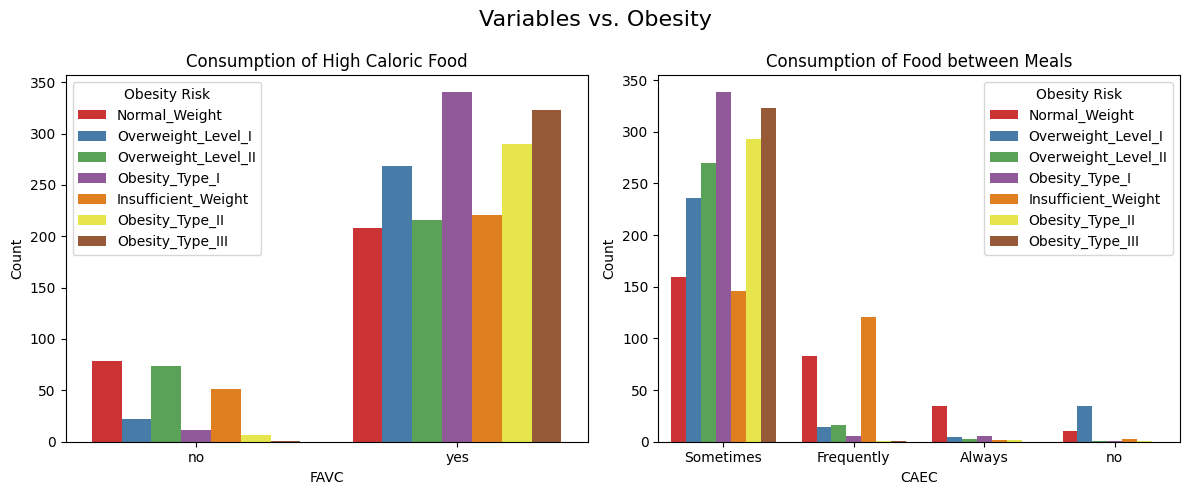

In [60]:
variables = ['FAVC', 'CAEC']
titles = ['Consumption of High Caloric Food', 'Consumption of Food between Meals']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Variables vs. Obesity', fontsize=16)

for i, variable in enumerate(variables):

    sns.countplot(x=variable, hue='NObeyesdad', data=data, ax=axes[i], palette='Set1')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    if i == 0:
        axes[i].legend(title='Obesity Risk', loc='upper left')
    else:
        axes[i].legend(title='Obesity Risk', loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

-The graph between FAVC and NObeyesdad shows that taking 3 meals a day, and if it includes high calorie food eveyrtime results in the obesity_type_II and obesity_type_III.

-The bar plot for FAVC depeicts that for high calorie consumption there are high chances of obesity.

-The 'sometimes' choice of consumption between meals have more bars for categories of obesity than the other parameters beacuse  Eating between meals "sometimes" may not provide the same level of satiety as balanced, complete meals. This can lead to a higher likelihood of overeating during subsequent meals, contributing to an overall excess of calories.

-Occasional snacking may disrupt the body's natural digestive processes. Over time, this can impact nutrient absorption and digestion, potentially influencing body weight.

-While some research suggests that eating smaller, more frequent meals may keep the metabolism active, occasional snacking may not have the same effect. Additionally, if the snacks chosen are high in calories, they can contribute to an overall calorie surplus.

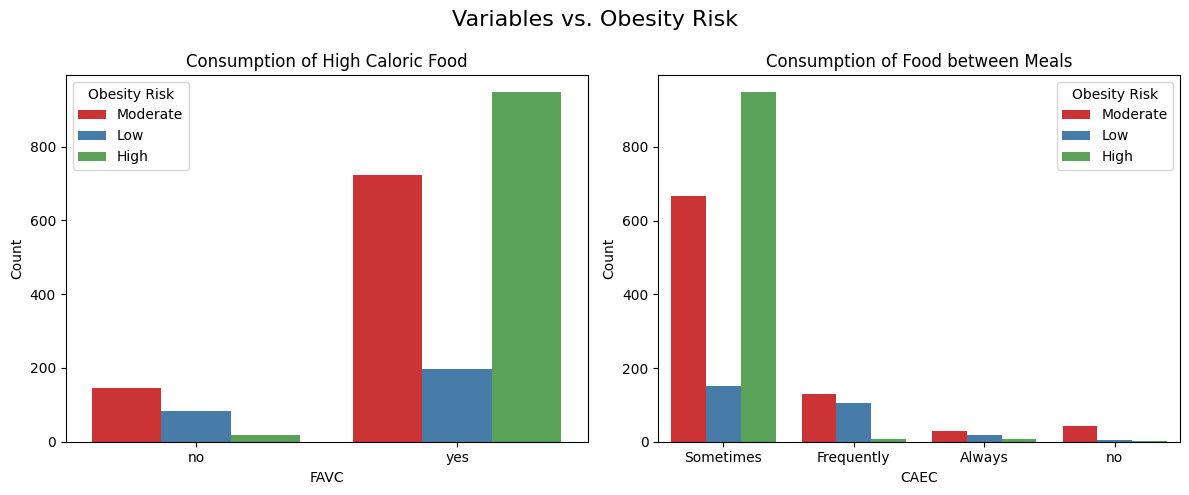

In [61]:
variables = ['FAVC', 'CAEC']
titles = ['Consumption of High Caloric Food', 'Consumption of Food between Meals']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Variables vs. Obesity Risk', fontsize=16)

for i, variable in enumerate(variables):

    sns.countplot(x=variable, hue='Obesity_Risk', data=data, ax=axes[i], palette='Set1')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Obesity Risk', loc='upper right')

axes[0].legend(title='Obesity Risk', loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

-The above plot justifies with the previous inferences about FAVC and CAEC relationship with the obesity.-The below plot justifies with the above inferences about FAVC and CAEC relationship with the obesity.